# 라이브러리 불러오기

In [ ]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 랜덤 시드 설정

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/8,9,10주차Project2/data/'

In [ ]:
train_data: pd.DataFrame = pd.read_csv(path+"train.csv")
test_data: pd.DataFrame = pd.read_csv(path+'test.csv')
sample_submission: pd.DataFrame = pd.read_csv(path+'sample_submission.csv')

# 데이터 EDA 수행하기

In [ ]:
display("train, test_data, sample_submission shape : ", train_data.shape, test_data.shape, sample_submission.shape)
display("train data 상단 5개 정보 확인 : ", train_data.head())
display("test data 상단 5개 정보 확인 : ", test_data.head())
# display("sample_submission 상단 5개 정보 확인 : ", sample_submission.head())
display("train data 변수 요약 정보 확인 : ", train_data.describe())
display("test data 변수 요약 정보 확인 : ", test_data.describe())

'train, test_data, sample_submission shape : '

(1801228, 11)

(150172, 10)

(150172, 2)

'train data 상단 5개 정보 확인 : '

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0


'test data 상단 5개 정보 확인 : '

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age
0,0,84.961,202404,12,1,14,2016,36.965423,127.048779,8
1,1,59.900,202404,13,0,4,1997,36.963105,127.040678,27
2,2,39.270,202404,29,0,5,1990,36.957089,127.047449,34
3,3,39.270,202405,3,0,1,1990,36.957089,127.047449,34
4,4,46.980,202406,2,0,4,1990,36.957089,127.047449,34


'train data 변수 요약 정보 확인 : '

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
count,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06
mean,9.006135e+05,7.518833e+01,2.021331e+05,1.589943e+01,1.203805e+00,1.005197e+01,2.004199e+03,3.747721e+01,1.269662e+02,1.706597e+01,3.816223e+04
std,5.199699e+05,2.552632e+01,1.352815e+02,8.625998e+00,8.852792e-01,6.973359e+00,1.115132e+01,1.625113e-01,1.701221e-01,1.112796e+01,2.610377e+04
min,0.000000e+00,1.032150e+01,2.019040e+05,1.000000e+00,0.000000e+00,-4.000000e+00,1.961000e+03,3.691791e+01,1.264787e+02,-3.000000e+00,3.000000e+02
25%,4.503068e+05,5.975000e+01,2.020080e+05,9.000000e+00,0.000000e+00,5.000000e+00,1.995000e+03,3.737976e+01,1.268422e+02,7.000000e+00,2.100000e+04
50%,9.006135e+05,7.715000e+01,2.021110e+05,1.600000e+01,2.000000e+00,9.000000e+00,2.004000e+03,3.750227e+01,1.269976e+02,1.700000e+01,3.200000e+04
75%,1.350920e+06,8.496000e+01,2.022120e+05,2.300000e+01,2.000000e+00,1.400000e+01,2.015000e+03,3.758205e+01,1.270888e+02,2.600000e+01,4.780000e+04
max,1.801227e+06,3.173600e+02,2.023120e+05,3.100000e+01,2.000000e+00,6.800000e+01,2.024000e+03,3.818194e+01,1.276609e+02,6.200000e+01,1.100000e+06


'test data 변수 요약 정보 확인 : '

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age
count,150172.00000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000
mean,75085.50000,74.509956,202403.137576,14.816650,0.426071,10.060557,2004.908292,37.474571,126.967625,19.091708
std,43351.06665,23.971424,1.645994,8.537693,0.597423,6.982813,11.460352,0.166952,0.172066,11.460352
min,0.00000,10.780000,202401.000000,1.000000,0.000000,-3.000000,1966.000000,36.957089,126.478708,0.000000
25%,37542.75000,59.760000,202402.000000,7.000000,0.000000,5.000000,1995.000000,37.372616,126.841057,8.000000
50%,75085.50000,75.793700,202403.000000,15.000000,0.000000,9.000000,2004.000000,37.500382,126.998922,20.000000
75%,112628.25000,84.958200,202405.000000,22.000000,1.000000,14.000000,2016.000000,37.588872,127.091862,29.000000
max,150171.00000,273.860000,202406.000000,31.000000,2.000000,60.000000,2024.000000,38.106033,127.660896,58.000000


# 대회에 필요한 데이터만 활용하기

In [ ]:
# columns_needed = ['area_m2', 'contract_year_month', 'contract_day', 'contract_type', 'floor', 'latitude', 'longitude', 'deposit']
# columns_needed_test = ['area_m2', 'contract_year_month', 'contract_day', 'contract_type', 'floor', 'latitude', 'longitude']
# train_data = train_data[columns_needed]
# test_data = test_data[columns_needed_test]

# Holdout 데이터셋 설정 (예: 2023년 7월부터 12월까지의 데이터)

In [ ]:
# holdout_start = 202307
# holdout_end = 202312
# holdout_data = train_data[(train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end)]
# train_data = train_data[~((train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end))]

# EDA

In [ ]:
print(len(train_data))

1801228


In [ ]:
print(train_data.duplicated(subset=train_data.columns.difference(['index'])).sum())  # 중복값이 많네 83617/1801228 = 0.0464 제거해도 될 듯?

83617
7380


In [ ]:
duplicates = train_data[train_data.drop(columns=['index']).duplicated(keep=False)]
duplicates

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
15,15,84.9342,201907,31,2,7,2016,36.965423,127.048779,3,18000.0
16,16,84.9342,201907,31,2,7,2016,36.965423,127.048779,3,18000.0
28,28,146.4005,201911,21,2,5,2016,36.965423,127.048779,3,37000.0
29,29,146.4005,201911,21,2,5,2016,36.965423,127.048779,3,37000.0
33,33,84.9342,201912,14,2,14,2016,36.965423,127.048779,3,19000.0
...,...,...,...,...,...,...,...,...,...,...,...
1801197,1801197,101.9088,202308,22,2,11,2010,37.528394,126.659398,13,33000.0
1801198,1801198,114.9285,202308,28,1,18,2010,37.528394,126.659398,13,30000.0
1801199,1801199,114.9285,202308,28,1,18,2010,37.528394,126.659398,13,30000.0
1801210,1801210,114.9285,202310,26,2,9,2010,37.528394,126.659398,13,39000.0


중복값 빼고 EDA 진행

In [ ]:
# 중복 빼고 전체 행
train_data = train_data.loc[~train_data.drop(columns=['index']).duplicated(keep='first')]

In [ ]:
train_data.isnull().sum().sum() # 결측치가 없네?

0

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717611 entries, 0 to 1801227
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   index                int64  
 1   area_m2              float64
 2   contract_year_month  int64  
 3   contract_day         int64  
 4   contract_type        int64  
 5   floor                int64  
 6   built_year           int64  
 7   latitude             float64
 8   longitude            float64
 9   age                  int64  
 10  deposit              float64
dtypes: float64(4), int64(7)
memory usage: 157.3 MB


날짜 컬럼 추가

In [ ]:
# 1. contract_year_month를 연도, 날짜로 분리
train_data['contract_year_month_str'] = train_data['contract_year_month'].astype(str).str[:4] + '-' + train_data['contract_year_month'].astype(str).str[4:]

# 2. contract_day를 두 자리 형식으로 변환
train_data['contract_day'] = train_data['contract_day'].astype(str).str.zfill(2)

# 3. contract_year_month와 contract_day를 결합하여 전체 날짜 형식 만들기
train_data['contract_full_date'] = train_data['contract_year_month_str'].astype(str) + '-' + train_data['contract_day']

# 4. 결합된 문자열을 다시 datetime 형식으로 변환
train_data['contract_full_date'] = pd.to_datetime(train_data['contract_full_date'], format='%Y-%m-%d')

train_data['contract_day'] = train_data['contract_day'].astype('int64')
train_data.drop('contract_year_month_str', axis=1, inplace=True)

# 확인: 변환된 날짜가 제대로 되었는지 확인
print(train_data[['contract_year_month', 'contract_day', 'contract_full_date']].head())


   contract_year_month  contract_day contract_full_date
0               201906            25         2019-06-25
1               202003            26         2020-03-26
2               202003            28         2020-03-28
3               201907            15         2019-07-15
4               201904            12         2019-04-12


In [ ]:
# 1. contract_year_month를 연도, 날짜로 분리
test_data['contract_year_month_str'] = test_data['contract_year_month'].astype(str).str[:4] + '-' + test_data['contract_year_month'].astype(str).str[4:]

# 2. contract_day를 두 자리 형식으로 변환
test_data['contract_day'] = test_data['contract_day'].astype(str).str.zfill(2)

# 3. contract_year_month와 contract_day를 결합하여 전체 날짜 형식 만들기
test_data['contract_full_date'] = test_data['contract_year_month_str'].astype(str) + '-' + test_data['contract_day']

# 4. 결합된 문자열을 다시 datetime 형식으로 변환
test_data['contract_full_date'] = pd.to_datetime(test_data['contract_full_date'], format='%Y-%m-%d')

test_data['contract_day'] = test_data['contract_day'].astype('int64')
test_data.drop('contract_year_month_str', axis=1, inplace=True)

# 확인: 변환된 날짜가 제대로 되었는지 확인
print(test_data[['contract_year_month', 'contract_day', 'contract_full_date']].head())


   contract_year_month  contract_day contract_full_date
0               202404            12         2024-04-12
1               202404            13         2024-04-13
2               202404            29         2024-04-29
3               202405             3         2024-05-03
4               202406             2         2024-06-02


### 시각화 EDA

상관관계 히트맵

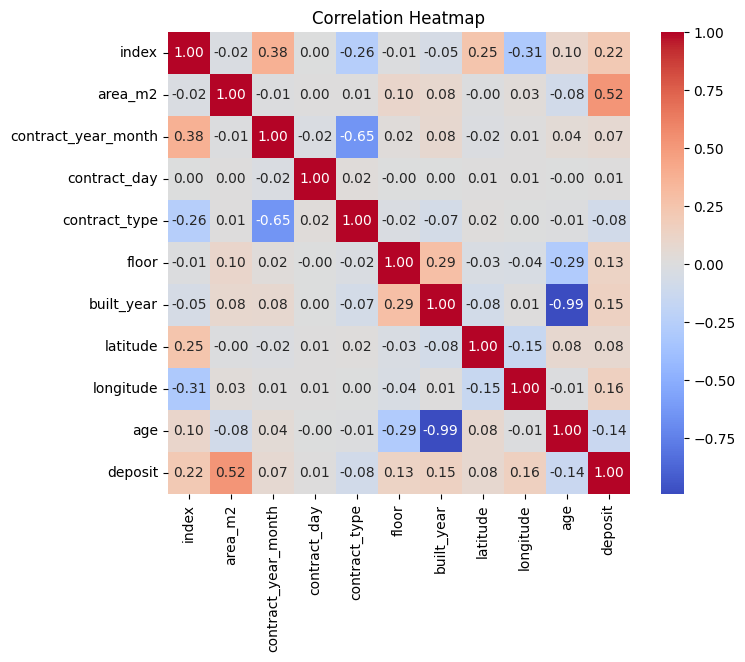

In [ ]:
corr_matrix = train_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

- 전세가와 양의 상관관계: area_m2  
- age와 built_year는 강한 음의 상관관계: 동일한 정보를 달리 표현한 변수니까 정보의 중복. 다중공선성 문제 발생 가능  
  -> 둘 중 하나만 쓰기  
- age: 건물이 얼마나 오래되었는지 직접적으로 나타내므로, 해석이 더 직관적
- 건축 연도: 특정 시점의 건축 트렌드나 규제, 경제 상황 등을 반영할 수 있습니다. 이를 통해 어떤 시기에 지어진 건물인지에 따른 부동산 시장의 전반적인 경향을 반영

built_year 컬럼 제거

In [ ]:
train_data = train_data.drop(columns=['built_year'])
test_data = test_data.drop(columns=['built_year'])

In [ ]:
train_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'latitude', 'longitude', 'age', 'deposit'],
      dtype='object')

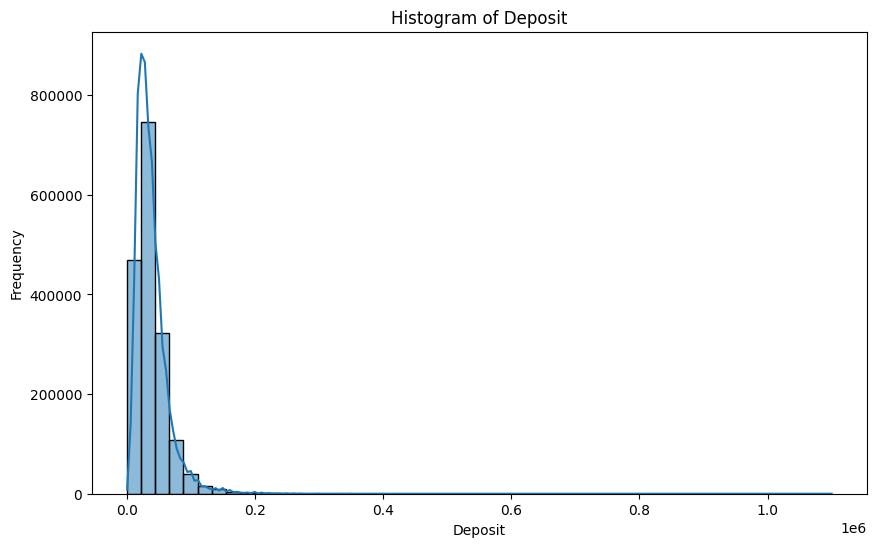

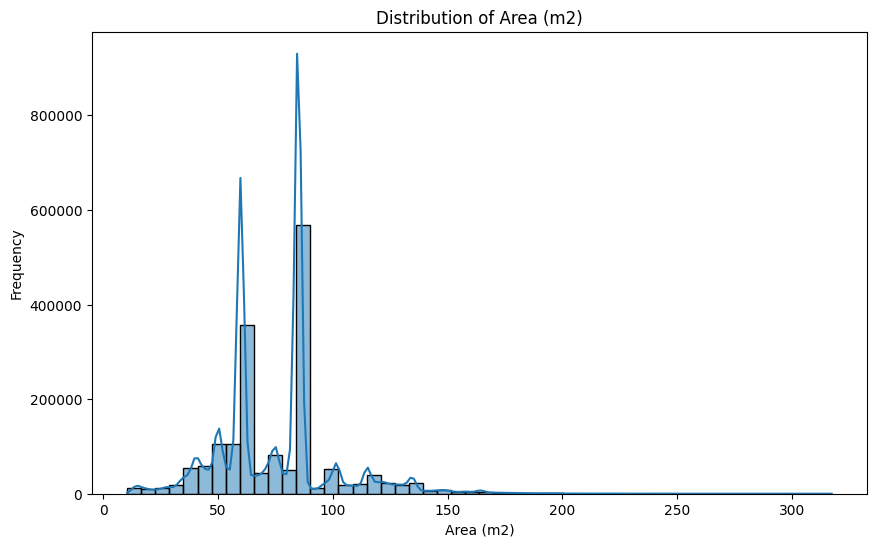

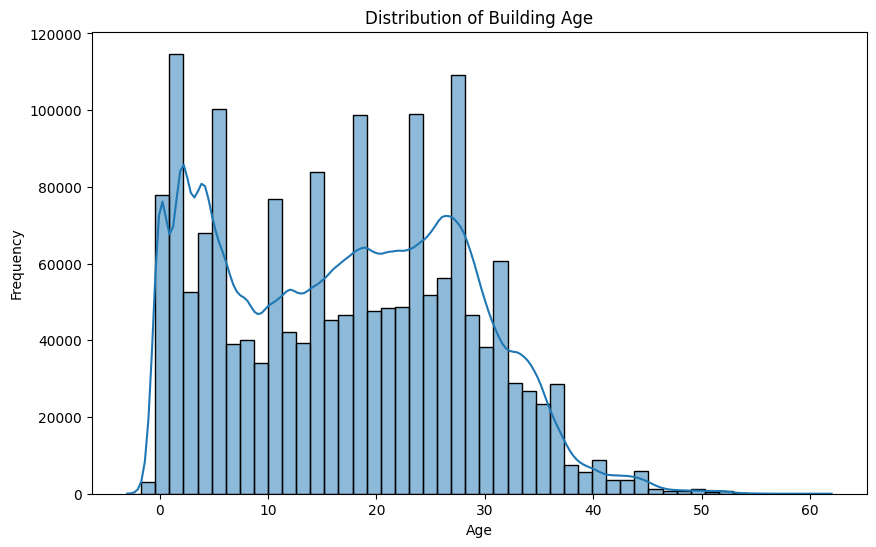

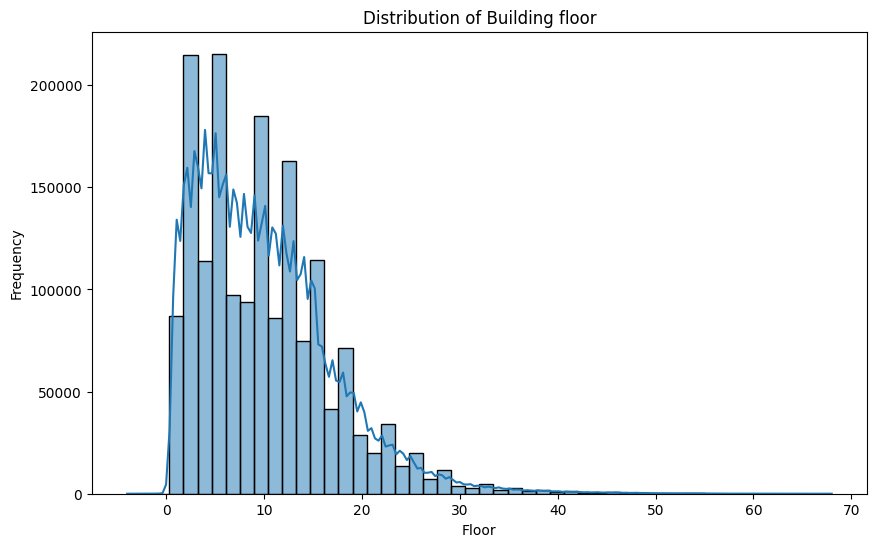

In [ ]:
# deposit 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_data['deposit'], bins=50, kde=True)
plt.title('Histogram of Deposit')
plt.xlabel('Deposit')
plt.ylabel('Frequency')
plt.show()

# 면적 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_data['area_m2'], bins=50, kde=True)
plt.title('Distribution of Area (m2)')
plt.xlabel('Area (m2)')
plt.ylabel('Frequency')
plt.show()

# 건물 나이 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_data['age'], bins=50, kde=True)
plt.title('Distribution of Building Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 층 수 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_data['floor'], bins=50, kde=True)
plt.title('Distribution of Building floor')
plt.xlabel('Floor')
plt.ylabel('Frequency')
plt.show()


계약 유형에 따른 전세 가격

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


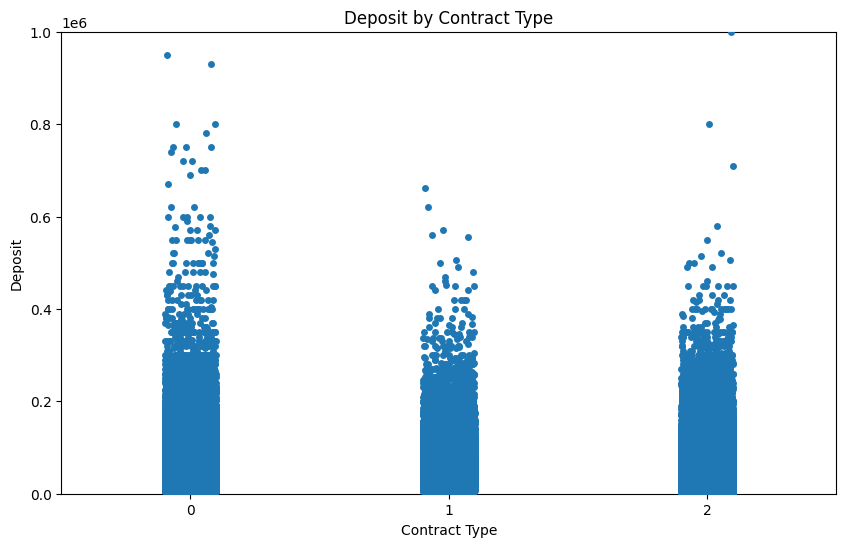

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=train_data, x='contract_type', y='deposit', jitter=True)

plt.title('Deposit by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Deposit')
plt.ylim(0, 1000000)
plt.show()


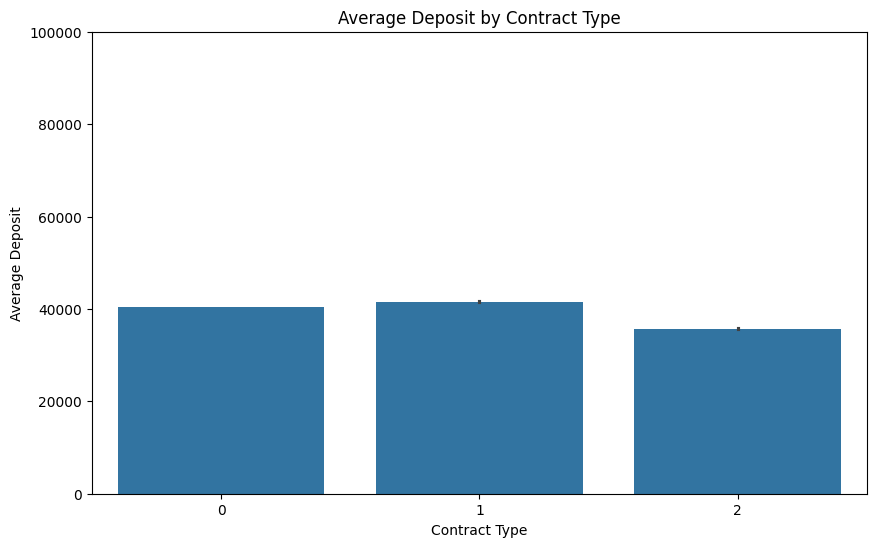

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='contract_type', y='deposit', estimator=np.mean)

plt.title('Average Deposit by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Deposit')
plt.ylim(0, 100000)
plt.show()


전세가격이 300에서 110만까지 있는데 평균은 3만8천

In [ ]:
train_data['deposit'].sort_values(ascending=False)

,deposit
1406833,1100000.0
1542638,1000000.0
1259330,950000.0
1260709,930000.0
1325914,800000.0
...,...
359221,500.0
62174,500.0
170048,500.0
62223,500.0


In [ ]:
print(train_data['deposit'].median())
print(train_data['deposit'].mean())

32000.0
38231.33403547136


In [ ]:
contract_type_counts = train_data['contract_type'].value_counts()
print(contract_type_counts)


contract_type
2    877162
0    530501
1    309948
Name: count, dtype: int64


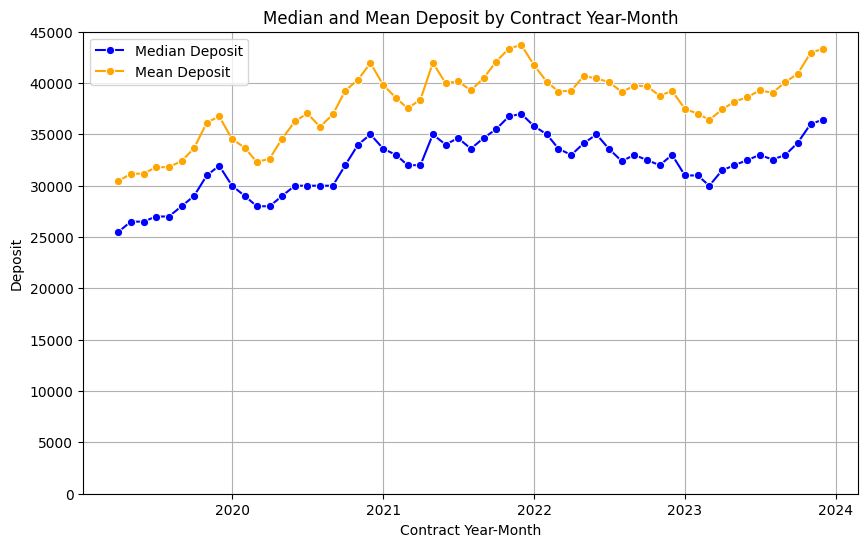

In [ ]:
# 계약년월별 미디안 및 평균 전세 실거래가 계산
summary_deposit = train_data.groupby('contract_year_month')['deposit'].agg(['median', 'mean']).reset_index()
summary_deposit['contract_year_month'] = pd.to_datetime(summary_deposit['contract_year_month'], format='%Y%m')

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_deposit, x=summary_deposit['contract_year_month'], y='median', marker='o', label='Median Deposit', color='blue')
sns.lineplot(data=summary_deposit, x=summary_deposit['contract_year_month'], y='mean', marker='o', label='Mean Deposit', color='orange')

# x축 레이블 설정
plt.title('Median and Mean Deposit by Contract Year-Month')
plt.xlabel('Contract Year-Month')

plt.ylabel('Deposit')
plt.ylim(0, 45000)

plt.grid()
plt.legend()
plt.show()

면적에 따른 전세 가격

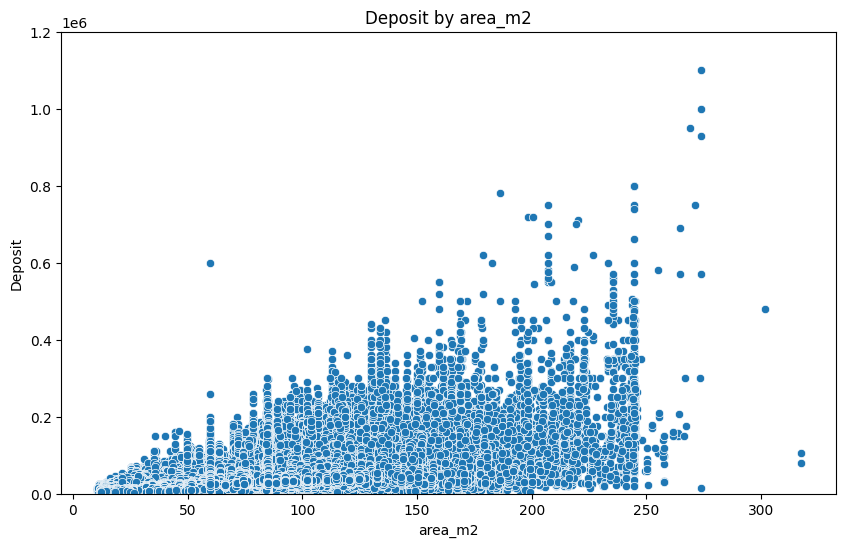

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='area_m2', y='deposit')
plt.title('Deposit by area_m2')
plt.xlabel('area_m2')
plt.ylabel('Deposit')
plt.ylim(0, 1200000)
plt.show()

층수에 따른 전세 가격

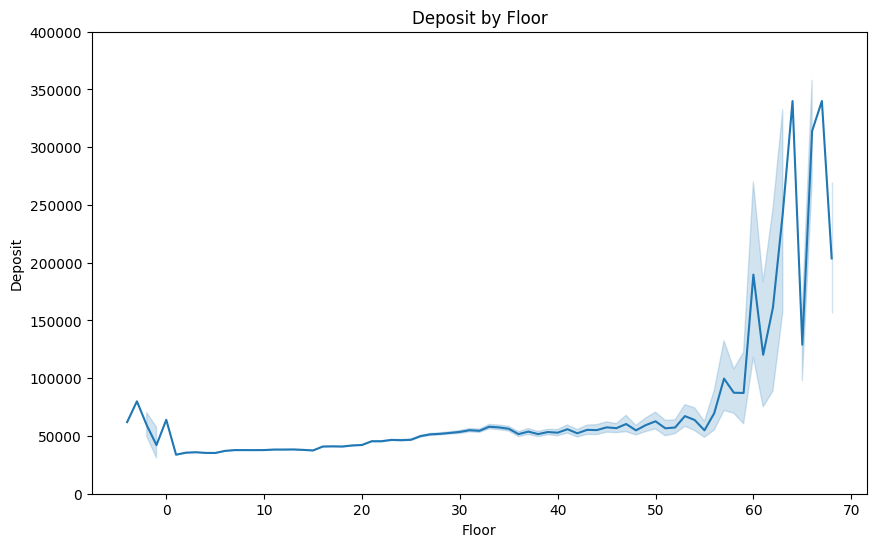

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='floor', y='deposit')
plt.title('Deposit by Floor')
plt.xlabel('Floor')
plt.ylabel('Deposit')
plt.ylim(0, 400000)
plt.show()

건물 나이별 전세가

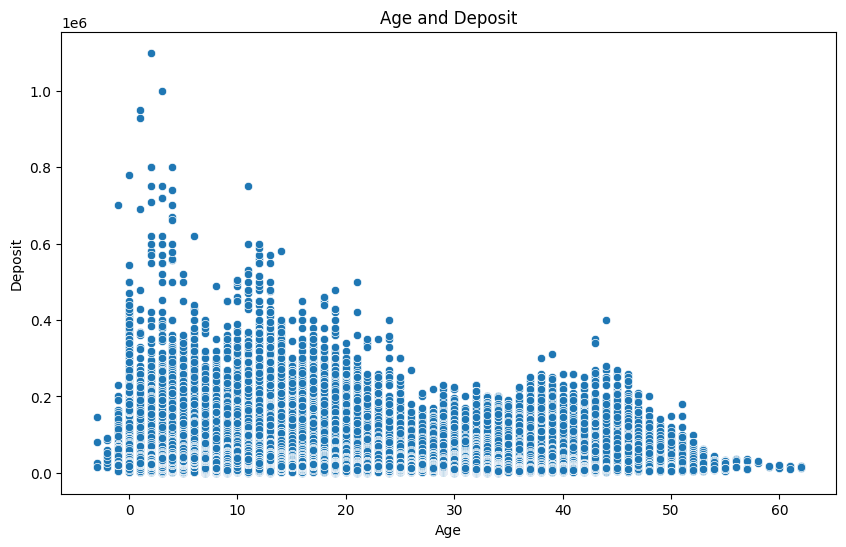

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='deposit', data=train_data)
plt.title('Age and Deposit')
plt.xlabel('Age')
plt.ylabel('Deposit')
plt.show()

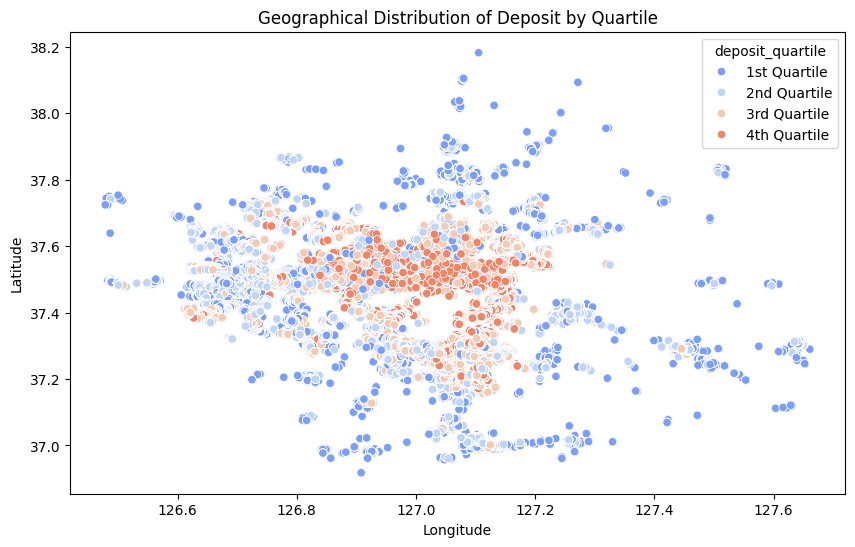

In [ ]:
# 사분위수로 나누기
train_data['deposit_quartile'] = pd.qcut(train_data['deposit'], 4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# 사분위수에 따른 경도위도값
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['longitude'], y=train_data['latitude'], hue=train_data['deposit_quartile'], palette='coolwarm')
plt.title('Geographical Distribution of Deposit by Quartile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

- 위도, 경도를 합쳐서 피처로 사용
- 군집별로 클러스터링하기

In [ ]:
# 위도와 경도를 문자열로 결합하여 하나의 컬럼으로 만들기
train_data['lat_long'] = train_data['latitude'].astype(str) + ',' + train_data['longitude'].astype(str)

test_data['lat_long'] = test_data['latitude'].astype(str) + ',' + test_data['longitude'].astype(str)

# 결과 확인
print(train_data['lat_long'])


0           37.054314,127.0452164
1           37.054314,127.0452164
2           37.054314,127.0452164
3           36.964647,127.0558472
4          36.9723899,127.0845143
                    ...          
1801223    37.5283944,126.6593984
1801224    37.5283944,126.6593984
1801225    37.5283944,126.6593984
1801226    37.5283944,126.6593984
1801227    37.5283944,126.6593984
Name: lat_long, Length: 1717611, dtype: object


In [ ]:
# import folium

# # 지도 생성 (한국 중앙 좌표로 설정)
# m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# # 데이터프레임의 각 행에 있는 위도와 경도를 반복문으로 순회하며 마커 추가
# for idx, row in train_data.iterrows():
#     # 위도와 경도 값이 존재하는 경우에만 마커 추가
#     if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
#         folium.Marker([row['latitude'], row['longitude']],
#                       popup=f"Location {idx}").add_to(m)

# # 지도 출력
# m


계절별 계약 건수

<ipython-input-11-1ef7402868f9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

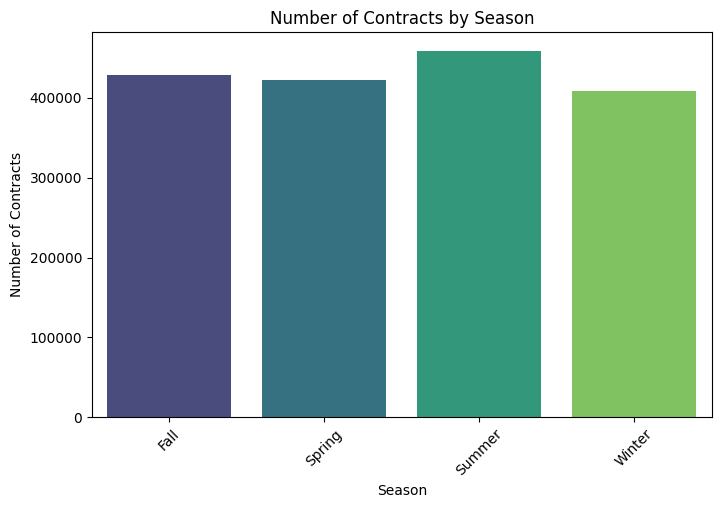

In [ ]:
# contract_year_month 컬럼에서 월 추출
train_data['month'] = (train_data['contract_year_month'] % 100)

# 월을 기준으로 계절 할당
conditions = [
    (train_data['month'] >= 3) & (train_data['month'] <= 5),  # 봄
    (train_data['month'] >= 6) & (train_data['month'] <= 8),  # 여름
    (train_data['month'] >= 9) & (train_data['month'] <= 11), # 가을
    (train_data['month'] == 12) | (train_data['month'] <= 2)  # 겨울
]

seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# 새로운 컬럼에 계절 할당
train_data['season'] = np.select(conditions, seasons)

# 계절별 계약 건수 집계
season_counts = train_data['season'].value_counts().sort_index()

# 계절별 계약 건수 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of Contracts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)
plt.show()

봄, 가을에 계약이 많다던데 아닌듯

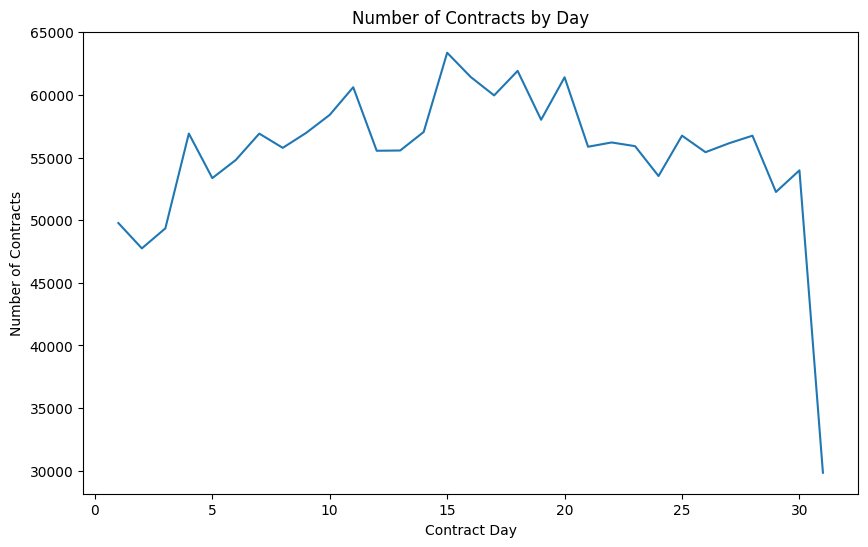

In [ ]:
# 계약 일자별 계약 수 시각화
contract_counts_by_day = train_data.groupby('contract_day').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=contract_counts_by_day, x='contract_day', y='count')
plt.title('Number of Contracts by Day')
plt.xlabel('Contract Day')
plt.ylabel('Number of Contracts')
plt.show()


월초, 월말에 계약이 적은 경향을 보이고,  
중간 날짜에 계약이 집중되는 경향

In [ ]:
# 계약 일자가 주말인지 여부를 확인하는 새로운 컬럼 생성
train_data['contract_day_of_week'] = pd.to_datetime(train_data['contract_year_month'].astype(str) + train_data['contract_day'].astype(str), format='%Y%m%d').dt.dayofweek
# 주말과 평일 구분
train_data['is_weekend'] = train_data['contract_day_of_week'] >= 5

# 주말/평일 별 계약 수 비교
contract_weekend_counts = train_data.groupby('is_weekend').size().reset_index(name='count')


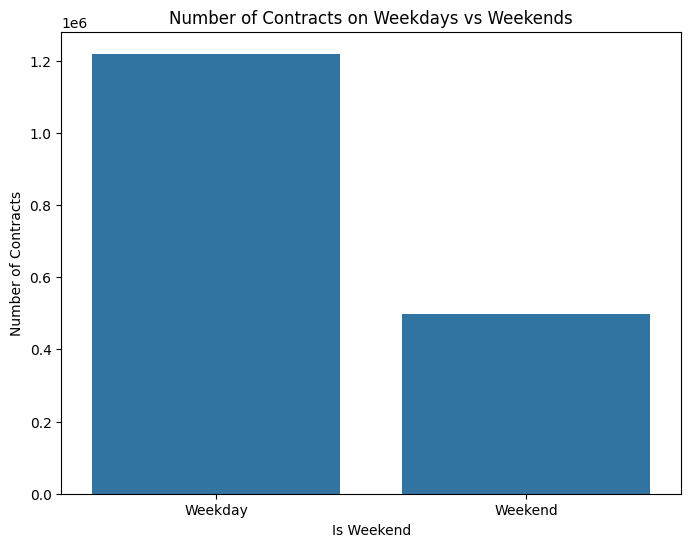

In [ ]:
# 주말/평일 계약 수 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=contract_weekend_counts, x='is_weekend', y='count')
plt.title('Number of Contracts on Weekdays vs Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Contracts')
plt.xticks([0, 1], ['Weekday', 'Weekend'])  # True/False를 평일/주말로 대체
plt.show()

### 금리 데이터

In [ ]:
#추가
interestRate = pd.read_csv(path+'interestRate.csv')
parkInfo = pd.read_csv(path+'parkInfo.csv')
schoolInfo = pd.read_csv(path+'schoolinfo.csv')
subwayInfo = pd.read_csv(path+'subwayInfo.csv')


In [ ]:
# 이후에 금리 데이터를 매핑한 컬럼을 feature로 사용하기 위해 test 데이터셋도 처리해주었습니다. (기호에 맞게 사용)

train_data = pd.merge(train_data, interestRate,
                        left_on='contract_year_month',
                        right_on='year_month',
                        how='left')
test_data = pd.merge(test_data, interestRate,
                        left_on='contract_year_month',
                        right_on='year_month',
                        how='left')

In [ ]:
train_data = train_data.drop(columns=['year_month'])
test_data = test_data.drop(columns=['year_month'])

In [ ]:
train_data

In [ ]:
train_data.dtypes

,0
index,int64
area_m2,float64
contract_year_month,int64
contract_day,object
contract_type,int64
floor,int64
latitude,float64
longitude,float64
age,int64
deposit,float64


In [ ]:
print(train_data['deposit'].sort_values())

61958          300.0
58766          500.0
340618         500.0
1386557        500.0
183108         500.0
             ...    
1263316     800000.0
1201061     930000.0
1199744     950000.0
1471310    1000000.0
1340876    1100000.0
Name: deposit, Length: 1717611, dtype: float64


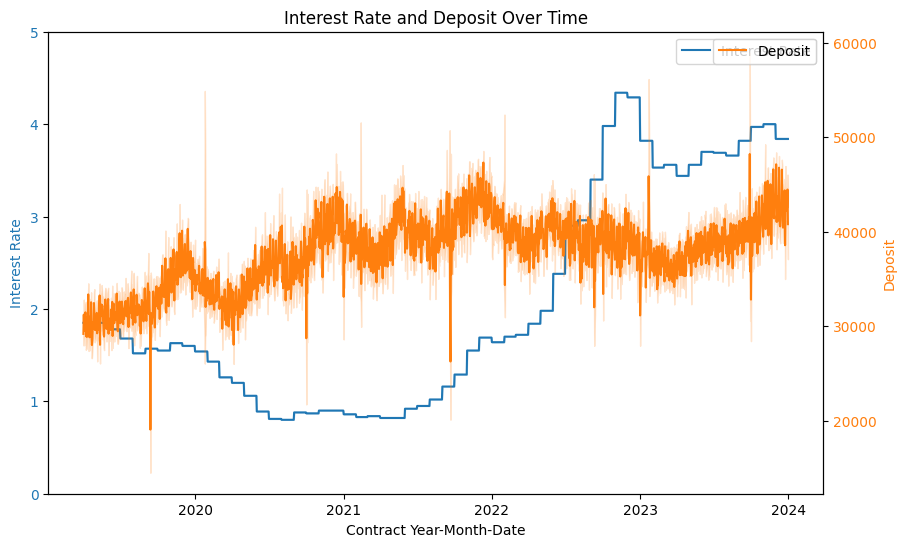

In [ ]:
# 시간에 따른 금리와 전세가의 변화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축: 금리
color = 'tab:blue'
ax1.set_xlabel('Contract Year-Month-Date')
ax1.set_ylabel('Interest Rate', color=color)
sns.lineplot(data=train_data, x='contract_full_date', y='interest_rate', ax=ax1, color=color, label='Interest Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 5)

# 두 번째 y축: 전세가
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Deposit', color=color)
sns.lineplot(data=train_data, x='contract_full_date', y='deposit', ax=ax2, color=color, label='Deposit')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Interest Rate and Deposit Over Time')
plt.xticks(rotation=45)

plt.show()

금리와 전세가는 상관관계 없어보임

### 지하철 데이터

실제 대도시에서는 지하철역과 500m 이내에 위치한 부동산은 전세가가 약 5~10% 이상 더 높은 경향이 있다.  
1km 이내 거리까지는 비교적 긍정적인 영향을 미친다.

In [ ]:
train_data.index

RangeIndex(start=0, stop=1717611, step=1)

In [ ]:
from scipy.spatial import cKDTree

# 하버사인 공식 적용
def haversine(lonlat1, lonlat2):
    # 지구 반지름 (단위: 미터)
    R = 6371000

    # 위도, 경도를 라디안으로 변환
    lon1, lat1 = np.radians(lonlat1[:, 0]), np.radians(lonlat1[:, 1])
    lon2, lat2 = np.radians(lonlat2[:, 0]), np.radians(lonlat2[:, 1])

    # 차이 계산
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # 하버사인 공식 적용
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # 거리는 R * c
    return R * c


def calculate_nearest_subway_distance(apart_coords, subway_coords):
    # cKDTree 생성
    tree = cKDTree(np.radians(subway_coords))  # 지하철 좌표를 라디안 단위로 변환하여 트리 생성

    # 모든 아파트에 대해 최근접 이웃 검색 (가장 가까운 지하철 찾기)
    distances, indices = tree.query(np.radians(apart_coords), k=1)  # 라디안으로 변환한 아파트 좌표로 최근접 이웃 검색

    # 최근접 이웃과 아파트 좌표 간의 하버사인 거리 계산
    nearest_distances = haversine(subway_coords[indices], apart_coords)

    return nearest_distances


# 아파트와 지하철의 좌표 (위도, 경도)
train_apart_coords = train_data[['latitude', 'longitude']].to_numpy()
subway_coords = subwayInfo[['latitude', 'longitude']].to_numpy()


In [ ]:
# 아파트별로 가장 가까운 지하철역까지의 거리 계산
train_data['nearest_subway_distance'] = calculate_nearest_subway_distance(train_apart_coords, subway_coords)

test_apart_coords = test_data[['latitude', 'longitude']].to_numpy()
test_data['nearest_subway_distance'] = calculate_nearest_subway_distance(test_apart_coords, subway_coords)

In [ ]:
train_data[['nearest_subway_distance']]

,nearest_subway_distance
0,857.916480
1,857.916480
2,857.916480
3,3698.482685
4,1231.527304
...,...
1717606,1811.902567
1717607,1811.902567
1717608,1811.902567
1717609,1811.902567


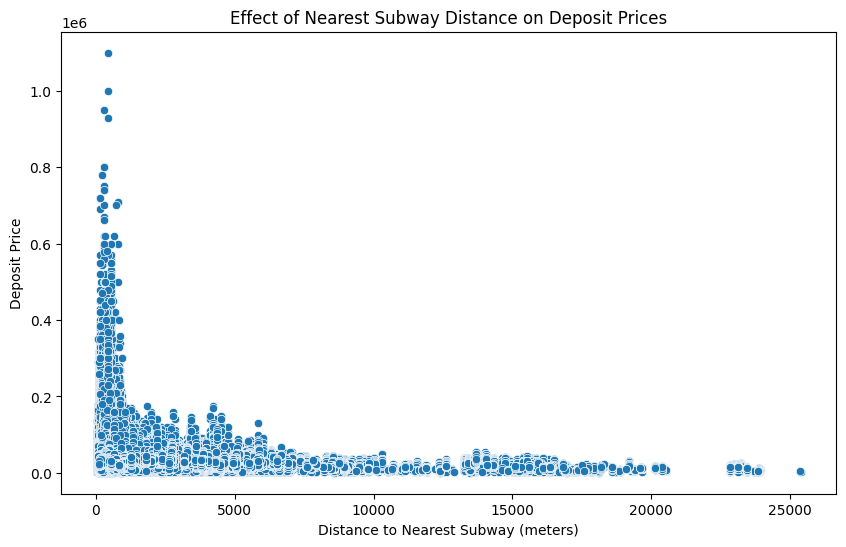

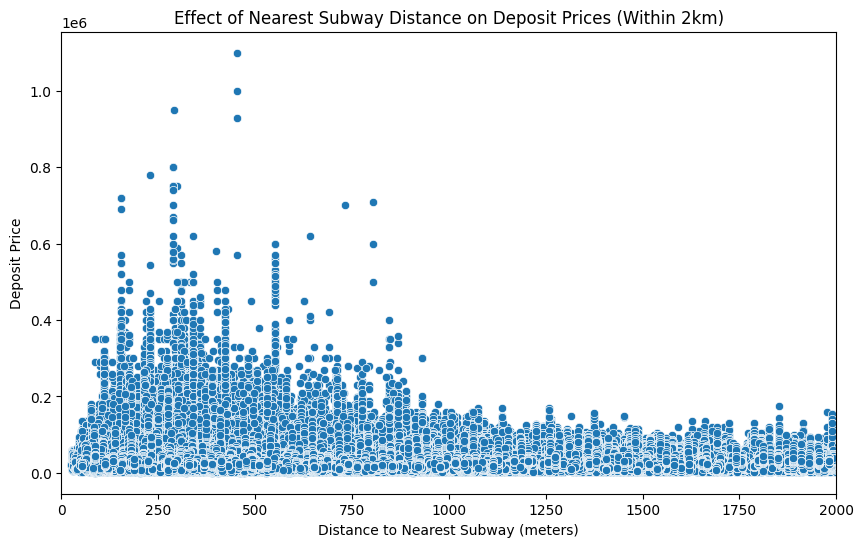

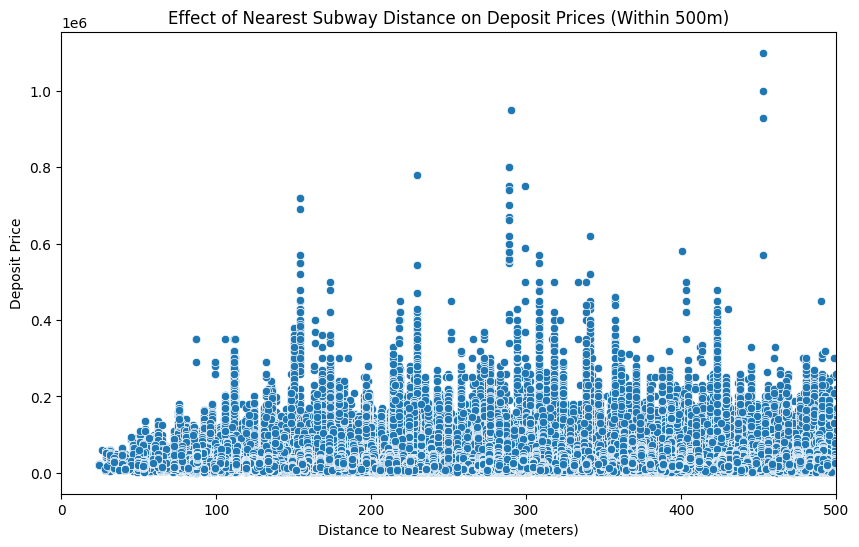

In [ ]:
# 가장 가까운 지하철역까지의 거리에 따른 전세가 비교
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_subway_distance', y='deposit', data=train_data)
plt.title('Effect of Nearest Subway Distance on Deposit Prices')
plt.xlabel('Distance to Nearest Subway (meters)')
plt.ylabel('Deposit Price')
plt.show()

# 지하철까지의 거리가 2km 이내에서 전세가 비교
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_subway_distance', y='deposit', data=train_data)
plt.title('Effect of Nearest Subway Distance on Deposit Prices (Within 2km)')
plt.xlabel('Distance to Nearest Subway (meters)')
plt.ylabel('Deposit Price')

# x축 범위 제한 (2km 이내)
plt.xlim(0, 2000)

plt.show()

# 지하철까지의 거리가 500m 이내에 전세가 비교
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_subway_distance', y='deposit', data=train_data)
plt.title('Effect of Nearest Subway Distance on Deposit Prices (Within 500m)')
plt.xlabel('Distance to Nearest Subway (meters)')
plt.ylabel('Deposit Price')

# x축 범위 제한 (500m 이내)
plt.xlim(0, 500)

plt.show()


- 지하철역까지의 거리가 가까울수록 전세가가 높아지는 경향을 보임
- 1km를 넘어가면 전세가가 거의 일정함
- 1km 내에서는 전세가가 다양하게 분포함
- 1km 내외를 기준으로 구분할 만한 듯 - 이진 분류?

In [ ]:
# 지하철 밀집도 계산
# 거리 범위 내의 지하철역 개수 계산
def count_subways_within_range(apart_coords, subway_coords, radius):
    """
    주어진 반경 내의 지하철역 개수를 계산하는 함수
    apart_coords: 아파트 좌표 (위도, 경도)
    subway_coords: 지하철 좌표 (위도, 경도)
    radius: 반경 (미터 단위)
    """
    # cKDTree를 사용하여 반경 내의 지하철역 탐색
    tree = cKDTree(np.radians(subway_coords))  # 라디안 변환된 지하철 좌표 사용
    apart_coords_rad = np.radians(apart_coords)  # 라디안 변환된 아파트 좌표

    # 반경 내 지하철역 찾기 (하버사인 거리 기준)
    indices_within_radius = tree.query_ball_point(apart_coords_rad, r=radius / 6371000)  # 반경을 라디안으로 변환

    # 각 아파트별 반경 내 지하철역 개수 계산
    subway_counts = [len(indices) for indices in indices_within_radius]

    return subway_counts

In [ ]:
# 반경 내 지하철역 개수
radius = 1000  # 1km 반경
train_data['subways_within_1km'] = count_subways_within_range(train_apart_coords, subway_coords, radius)

# 1km 반경 내 지하철 밀집도 계산
# 1km 반경의 면적은 약 3.141592 km² (이를 이용해 밀집도를 구함)
area_1km_km2 = (np.pi * (radius / 1000) ** 2)  # km² 단위로 면적 계산

# 밀집도를 제곱킬로미터(km²)당 지하철역 개수로 변환
train_data['subway_density_1km'] = train_data['subways_within_1km'] / area_1km_km2

# 결과 확인
print(train_data[['subways_within_1km', 'subway_density_1km']].head())


   subways_within_1km  subway_density_1km
0                   1             0.31831
1                   1             0.31831
2                   1             0.31831
3                   0             0.00000
4                   0             0.00000


In [ ]:
test_data['subways_within_1km'] = count_subways_within_range(test_apart_coords, subway_coords, radius)

# 1km 반경 내 지하철 밀집도 계산
# 1km 반경의 면적은 약 3.141592 km² (이를 이용해 밀집도를 구함)
area_1km_km2 = (np.pi * (radius / 1000) ** 2)  # km² 단위로 면적 계산

# 밀집도를 제곱킬로미터(km²)당 지하철역 개수로 변환
test_data['subway_density_1km'] = test_data['subways_within_1km'] / area_1km_km2


### 학교 데이터

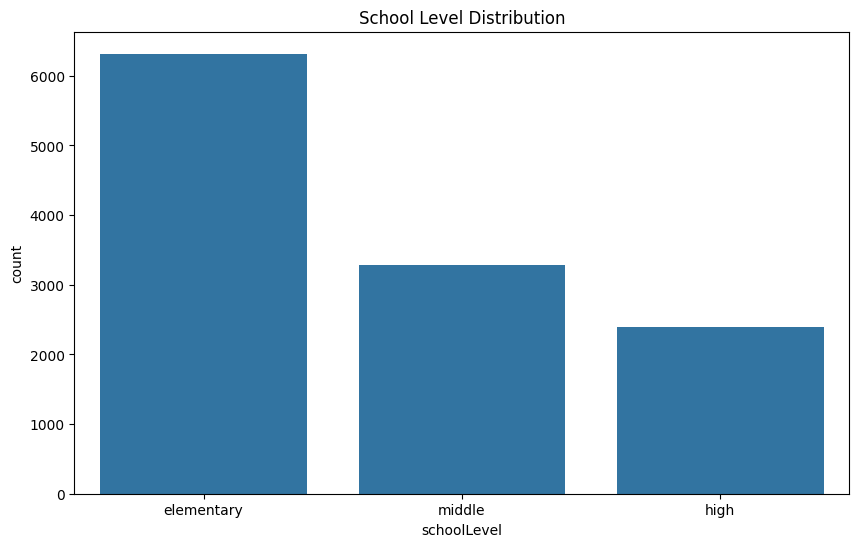

In [ ]:
# 학교 종류별 카운트

plt.figure(figsize=(10, 6))
sns.countplot(x='schoolLevel', data=schoolInfo)
plt.title('School Level Distribution')
plt.show()

In [ ]:
def calculate_nearest_school_distance(apart_coords, school_info):
    # 학교 레벨별로 거리 계산을 위한 빈 딕셔너리 초기화
    nearest_distances = {}

    # 각 학교 레벨에 대한 거리 계산
    for level in school_info['schoolLevel'].unique():
        level_coords = school_info[school_info['schoolLevel'] == level][['latitude', 'longitude']].to_numpy()

        if level_coords.shape[0] > 0:
            tree = cKDTree(level_coords)
            distances, indices = tree.query(apart_coords)

            nearest_distances[level] = haversine(tree.data[indices], apart_coords)

    return nearest_distances


# 각 아파트에 대해 가까운 학교 거리 추가
nearest_school_distances = calculate_nearest_school_distance(train_apart_coords, schoolInfo)
for level in nearest_school_distances:
    train_data[f'nearest_{level}_distance'] = nearest_school_distances[level]

nearest_school_distances = calculate_nearest_school_distance(test_apart_coords, schoolInfo)
for level in nearest_school_distances:
    test_data[f'nearest_{level}_distance'] = nearest_school_distances[level]


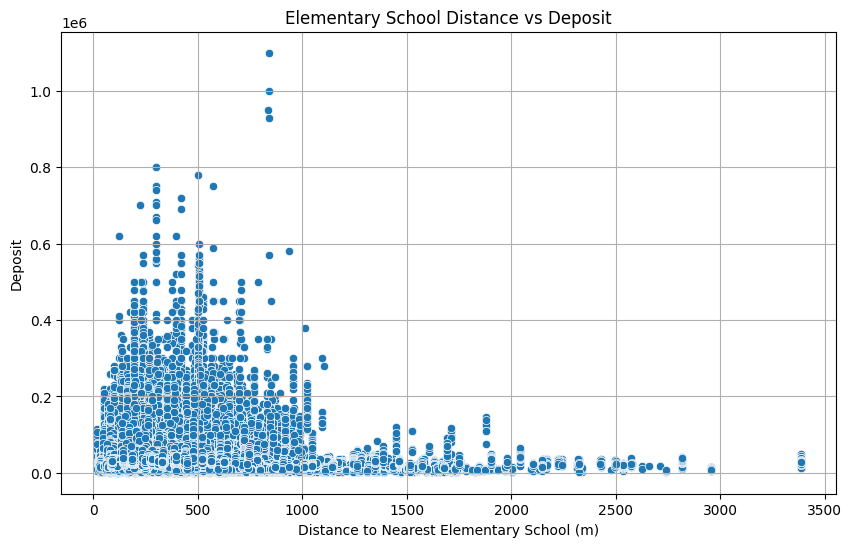

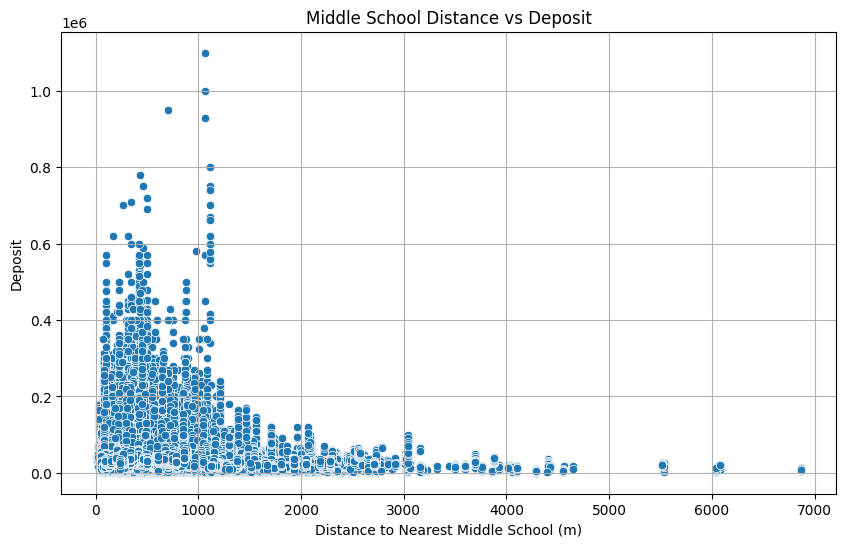

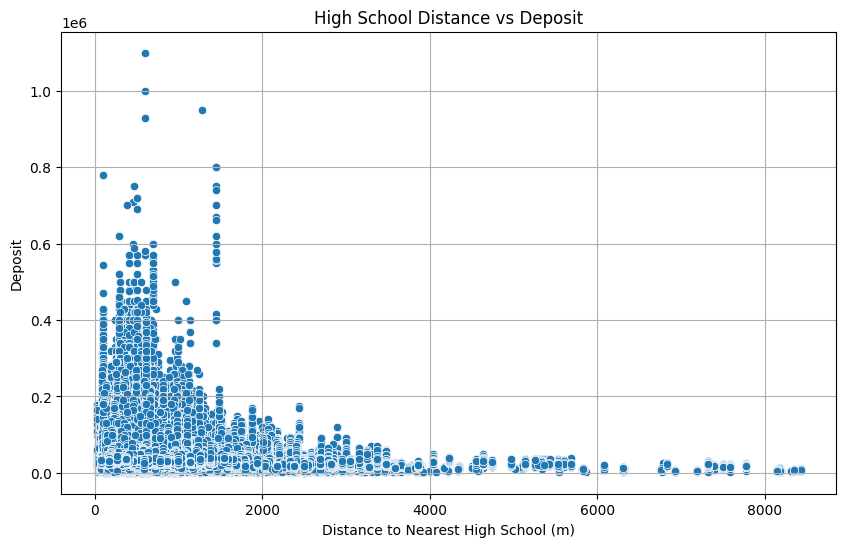

In [ ]:
for level in schoolInfo['schoolLevel'].unique():

    plt.figure(figsize=(10,6))
    sns.scatterplot(x=f'nearest_{level}_distance', y='deposit', data=train_data)
    plt.title(f'{level.capitalize()} School Distance vs Deposit')
    plt.xlabel(f'Distance to Nearest {level.capitalize()} School (m)')
    plt.ylabel('Deposit')
    plt.grid(True)
    plt.show()

### 공원 데이터

area가 0인 행 제거

In [ ]:
parkInfo = parkInfo[parkInfo['area'] > 0]

- 아파트에서 공원까지의 거리를 계산해서 전세가에 미치는 영향을 확인하고  
- 유의미한 거리 내에서 공원의 면적이 전세가에 미치는 영향 확인

In [ ]:
# 최근접 공원 거리 계산 함수
def calculate_nearest_park_distance(apart_coords, park_coords):
    tree = cKDTree(np.radians(park_coords))  # 공원 좌표를 KDTree로 변환
    distances, indices = tree.query(np.radians(apart_coords), k=1)  # 최근접 공원 거리 검색
    return haversine(apart_coords, park_coords[indices])


park_coords = parkInfo[['latitude', 'longitude']].to_numpy()

In [ ]:
# 각 아파트에 대해 가장 가까운 공원까지의 거리 계산
train_data['nearest_park_distance'] = calculate_nearest_park_distance(train_apart_coords, park_coords)

test_data['nearest_park_distance'] = calculate_nearest_park_distance(test_apart_coords, park_coords)

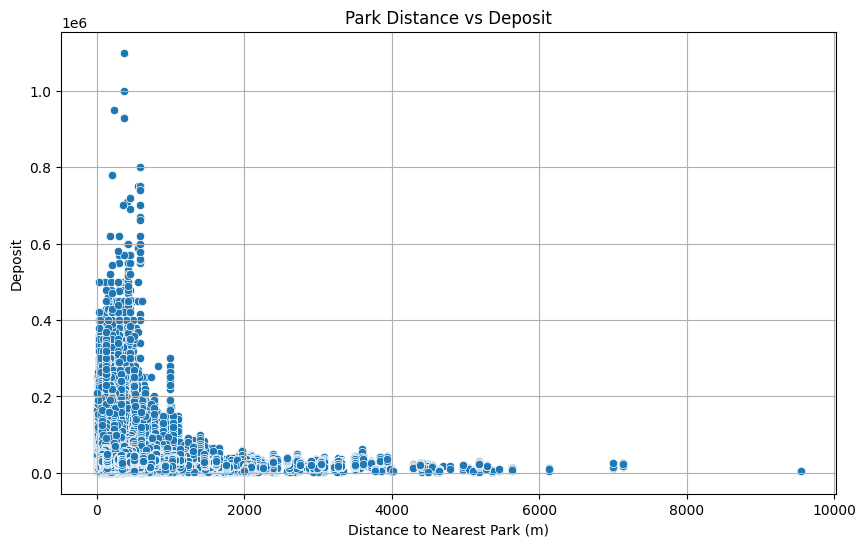

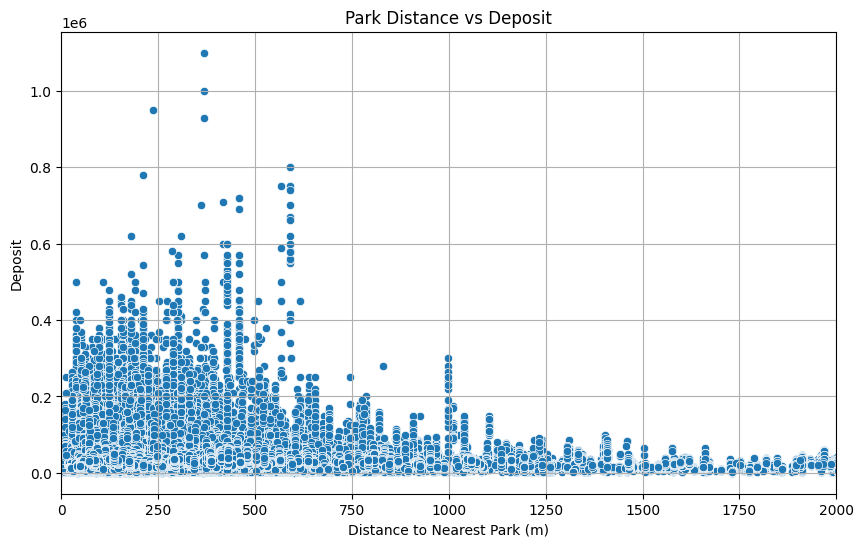

In [ ]:
# 공원까지의 거리와 전세가 시각화
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nearest_park_distance', y='deposit', data=train_data)

plt.title('Park Distance vs Deposit')
plt.xlabel('Distance to Nearest Park (m)')
plt.ylabel('Deposit')
plt.grid(True)
plt.show()

# 2000m 이내일 때
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nearest_park_distance', y='deposit', data=train_data)

plt.title('Park Distance vs Deposit')
plt.xlabel('Distance to Nearest Park (m)')
plt.ylabel('Deposit')
plt.xlim(0, 2000)
plt.grid(True)
plt.show()


In [ ]:
train_data['nearest_park_distance'].sort_values()

,nearest_park_distance
576583,0.002015
576623,0.002015
576622,0.002015
576621,0.002015
366250,0.002015
...,...
754859,7135.703111
1646321,9546.994272
1607590,9546.994272
1544722,9546.994272


1km 이내의 공원의 면적이 크면 전세가에 영향을 미칠까?

In [ ]:
def nearest_park_area(apart_coords, park_coords, park_areas):
    tree = cKDTree(np.radians(park_coords))  # 공원 좌표로 KDTree 생성
    distances, indices = tree.query(np.radians(apart_coords), k=1)  # 가장 가까운 공원 인덱스 검색
    return park_areas[indices]  # 가장 가까운 공원의 면적 반환

# 공원 면적 데이터
park_areas = parkInfo['area'].to_numpy()

# 각 아파트에 대해 가장 가까운 공원의 면적 추가
train_data['nearest_park_area'] = nearest_park_area(train_apart_coords, park_coords, park_areas)

test_data['nearest_park_area'] = nearest_park_area(test_apart_coords, park_coords, park_areas)

# 결과 확인
print(train_data[['nearest_park_distance', 'nearest_park_area', 'deposit']].head())


   nearest_park_distance  nearest_park_area  deposit
0             359.024159             8285.0  17000.0
1             359.024159             8285.0  23000.0
2             359.024159             8285.0  23000.0
3             160.243217             1616.0   5000.0
4             472.095753             3986.0   1800.0


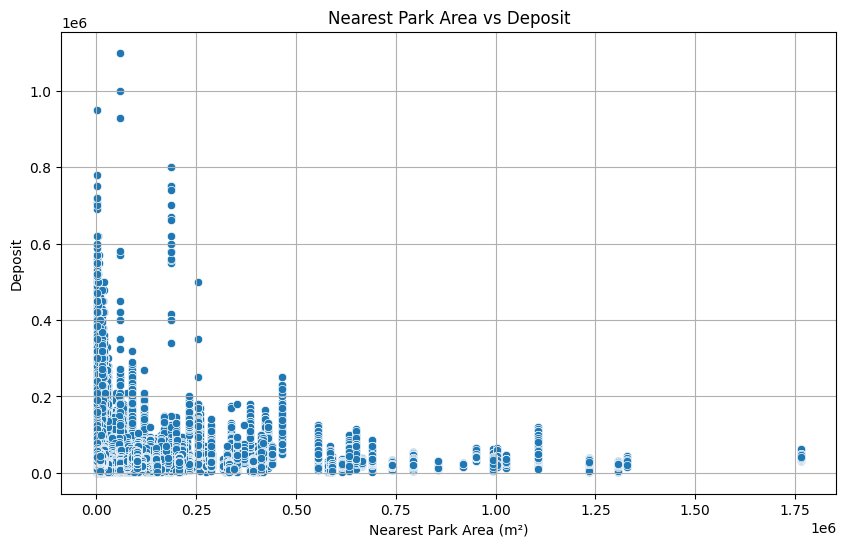

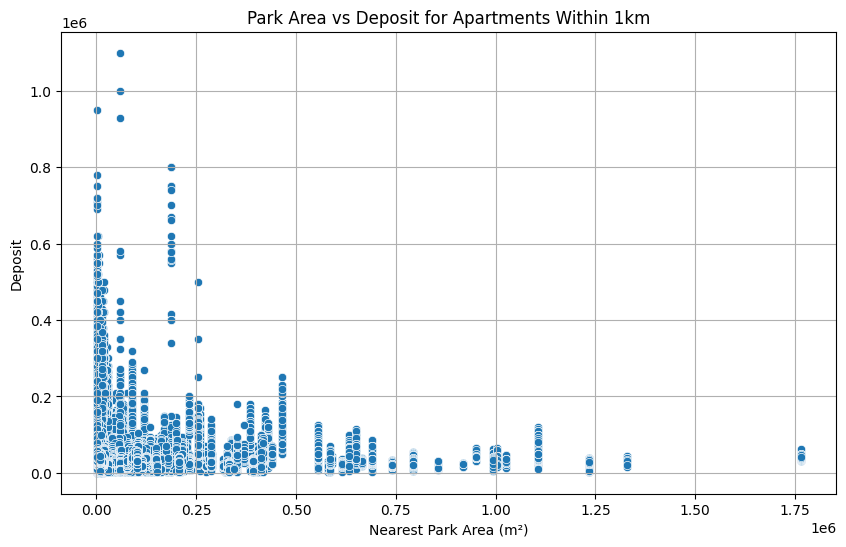

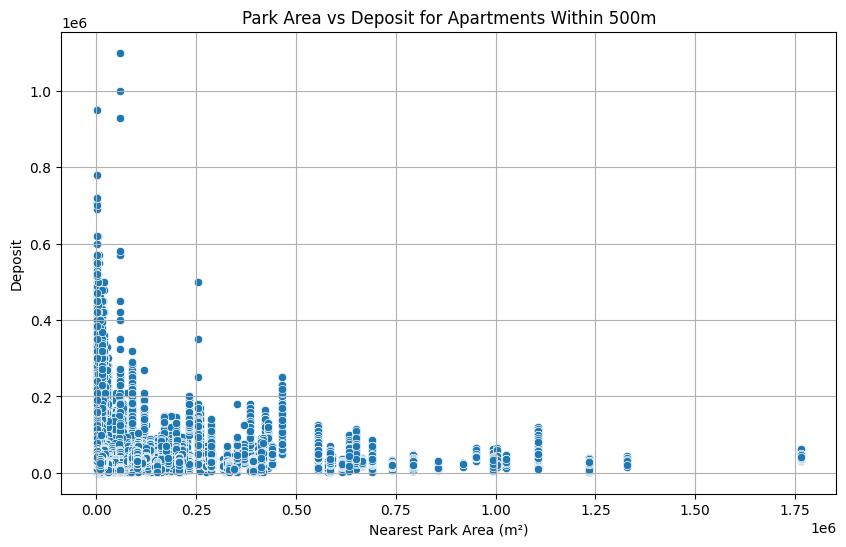

In [ ]:
# 공원 면적과 전세가의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_park_area', y='deposit', data=train_data)

plt.title('Nearest Park Area vs Deposit')
plt.xlabel('Nearest Park Area (m²)')
plt.ylabel('Deposit')
plt.grid(True)
plt.show()


# 1km 이내에 있는 아파트 필터링
within_1km = train_data[train_data['nearest_park_distance'] <= 1000]

# 1km 이내에 있는 공원 면적과 전세가 비교
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_park_area', y='deposit', data=within_1km)

plt.title('Park Area vs Deposit for Apartments Within 1km')
plt.xlabel('Nearest Park Area (m²)')
plt.ylabel('Deposit')
plt.grid(True)
plt.show()


# 500m 이내에 있는 아파트 필터링
within_500m = train_data[train_data['nearest_park_distance'] <= 500]

# 500m 이내 공원 면적과 전세가 비교
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_park_area', y='deposit', data=within_500m)

plt.title('Park Area vs Deposit for Apartments Within 500m')
plt.xlabel('Nearest Park Area (m²)')
plt.ylabel('Deposit')
plt.grid(True)
plt.show()


# 학습 데이터와 정답 데이터 분리

In [ ]:
holdout_start = 202307
holdout_end = 202312
holdout_data = train_data[(train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end)]
train_data = train_data[~((train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end))]

In [ ]:
X_train = train_data.drop(columns=['deposit'])
y_train = train_data['deposit']
X_holdout = holdout_data.drop(columns=['deposit'])
y_holdout = holdout_data['deposit']
X_test = test_data.copy()

# LightGBM 모델 훈련

In [ ]:
lgb_model = lgb.LGBMRegressor(random_state=RANDOM_SEED)
lgb_model.fit(X_train, y_train)

# Holdout 데이터셋에 대한 성능 확인

In [ ]:
lgb_holdout_pred = lgb_model.predict(X_holdout)
lgb_holdout_mae = mean_absolute_error(y_holdout, lgb_holdout_pred)
print("Holdout 데이터셋 성능:")
print(f"LightGBM MAE: {lgb_holdout_mae:.2f}")

# Sample Submission 제출하기

In [ ]:
lgb_test_pred = lgb_model.predict(X_test)
sample_submission['deposit'] = lgb_test_pred
sample_submission.to_csv('output.csv', index=False, encoding='utf-8-sig')